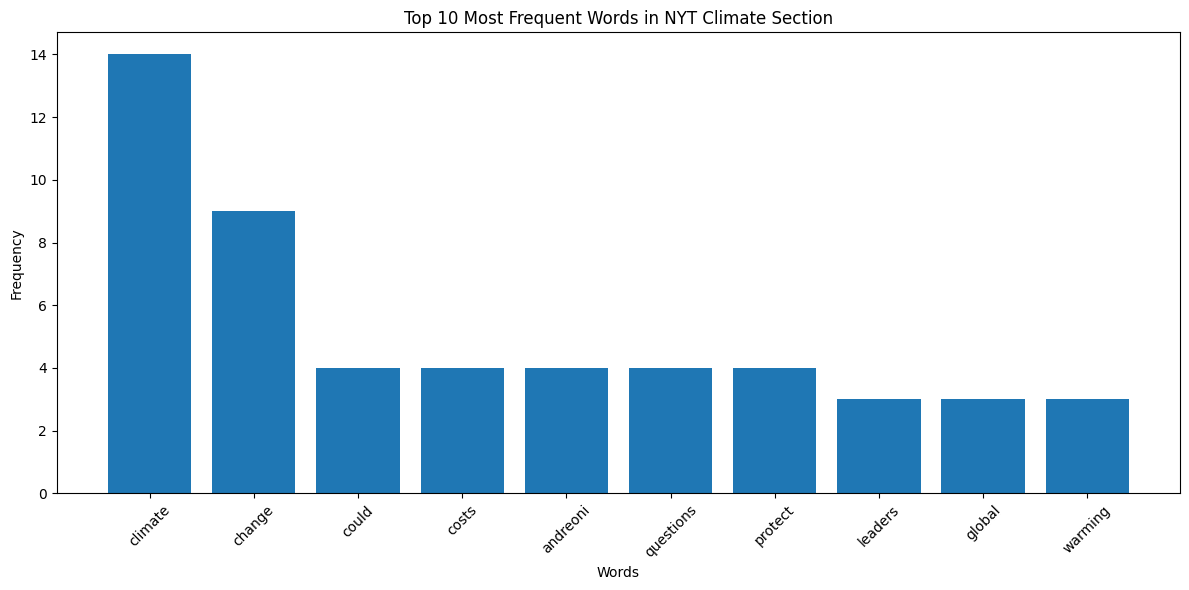

Top 10 most frequent words:
climate: 14
change: 9
could: 4
costs: 4
andreoni: 4
questions: 4
protect: 4
leaders: 3
global: 3
warming: 3
Average sentiment score: 0.05
The overall sentiment is positive
Text Summary:
By David Gelles Send Us Your Questions About Climate Change What should The Times ask change experts, world leaders and policymakers at its Climate Forward conference on Sept. 25? By Christopher Flavelle Brazil is proposing a fund that would pay countries to protect tropical forests that are crucial to curbing climate change. Answers Our Questions The Times hosted leaders and policymakers to talk about growing threats of climate change, and spoke with the C.E.O.
Word frequency visualization


In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('vader_lexicon', quiet=True)

url = 'https://www.nytimes.com/section/climate'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
paragraphs = soup.find_all('p')
text = ' '.join([p.get_text() for p in paragraphs])

sentences = sent_tokenize(text)
words = word_tokenize(text.lower())
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.isalnum() and word not in stop_words]

word_freq = Counter(filtered_words)
top_words = word_freq.most_common(10)

sia = SentimentIntensityAnalyzer()
sentiment_scores = [sia.polarity_scores(sentence)['compound'] for sentence in sentences]
average_sentiment = sum(sentiment_scores) / len(sentiment_scores)

word_frequencies = {}
for word in filtered_words:
    word_frequencies[word] = word_frequencies.get(word, 0) + 1

max_frequency = max(word_frequencies.values())
for word in word_frequencies:
    word_frequencies[word] /= max_frequency

sentence_scores = {}
for sentence in sentences:
    for word in word_tokenize(sentence.lower()):
        if word in word_frequencies and len(sentence.split()) < 30:
            sentence_scores[sentence] = sentence_scores.get(sentence, 0) + word_frequencies[word]

summary_sentences = sorted(sentence_scores, key=sentence_scores.get, reverse=True)[:3]
summary = ' '.join(summary_sentences)

plt.figure(figsize=(12, 6))
plt.bar([word for word, _ in top_words], [count for _, count in top_words])
plt.title("Top 10 Most Frequent Words in NYT Climate Section")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Top 10 most frequent words:")
for word, count in top_words:
    print(f"{word}: {count}")

print(f"\
Average sentiment score: {average_sentiment:.2f}")
print("The overall sentiment is", "positive" if average_sentiment > 0.05 else "negative" if average_sentiment < -0.05 else "neutral")

print("\
Text Summary:")
print(summary)

print("\
Word frequency visualization")